<a href="https://colab.research.google.com/github/ArminD93/WorldHappinessReport/blob/dev_Report2015/WorldHappinessReport_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/WorldHappiness/'
%run WorldHappinessReport_configuration.ipynb

happiness2015 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2015.csv', low_memory=False)

DistributionObj = Distribution(happiness2015)
CorrelationObj = Correlation(dataset=happiness2015)

happiness2015.head()

/content/drive/My Drive/ColabNotebooks/WorldHappiness


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [3]:
happiness2015.shape

(158, 12)

In [4]:
happiness2015.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 34.6 KB


In [5]:
happiness2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [7]:
happiness2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


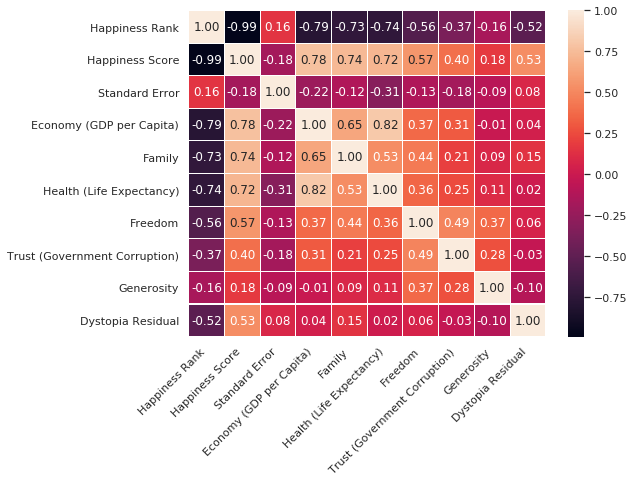

In [8]:
CorrelationObj.addCorrelationmap

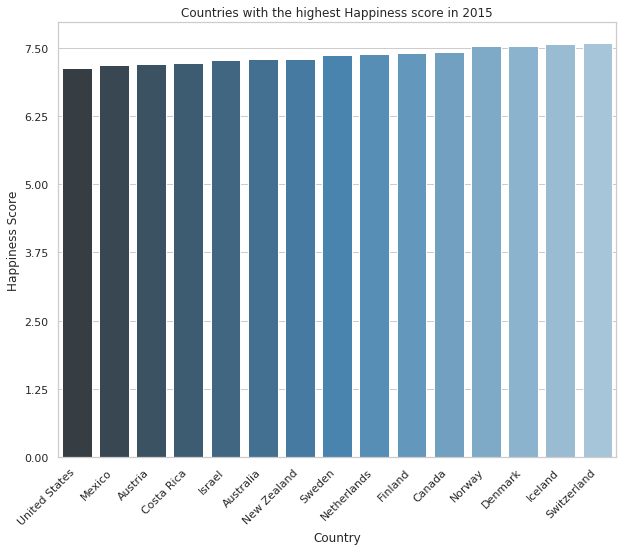

In [9]:
# Countries with the highest Happiness score in 2015
Sortedhappiness2015 = happiness2015.sort_values(by='Happiness Score')
Sortedhappiness2015Greaterthan7 = Sortedhappiness2015['Happiness Score'] >= 7
Sortedhappiness2015Greaterthan7 = Sortedhappiness2015[Sortedhappiness2015Greaterthan7]

x_data= 'Country'

sns.set_style('whitegrid') 
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0, 14, step=1.25))

g = sns.barplot(  data=Sortedhappiness2015Greaterthan7, x=x_data,  y='Happiness Score',palette='Blues_d'  )

g.set( xlabel='Country', ylabel='Happiness Score', title='Countries with the highest Happiness score in 2015')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

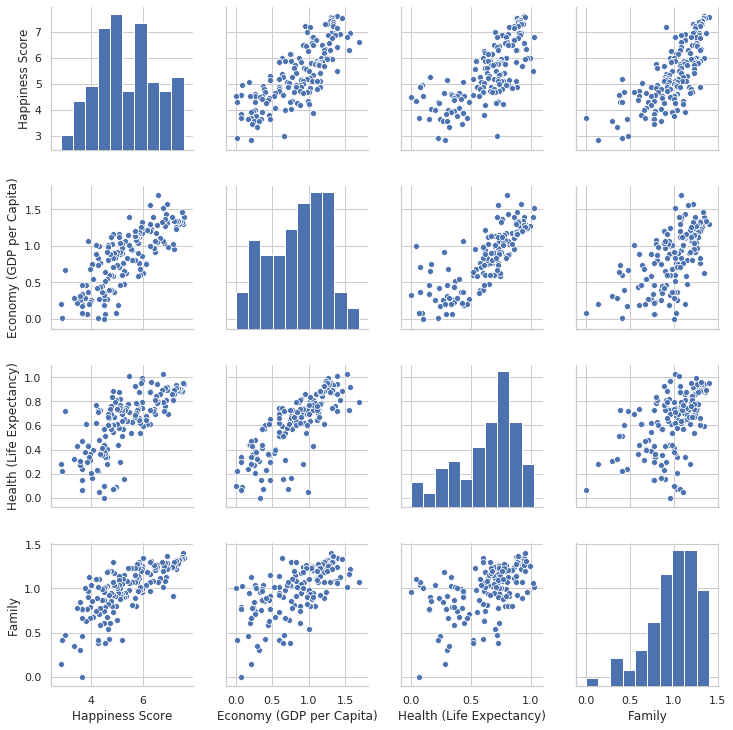

In [10]:
List = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']
sns.pairplot(happiness2015[List])
plt.show()

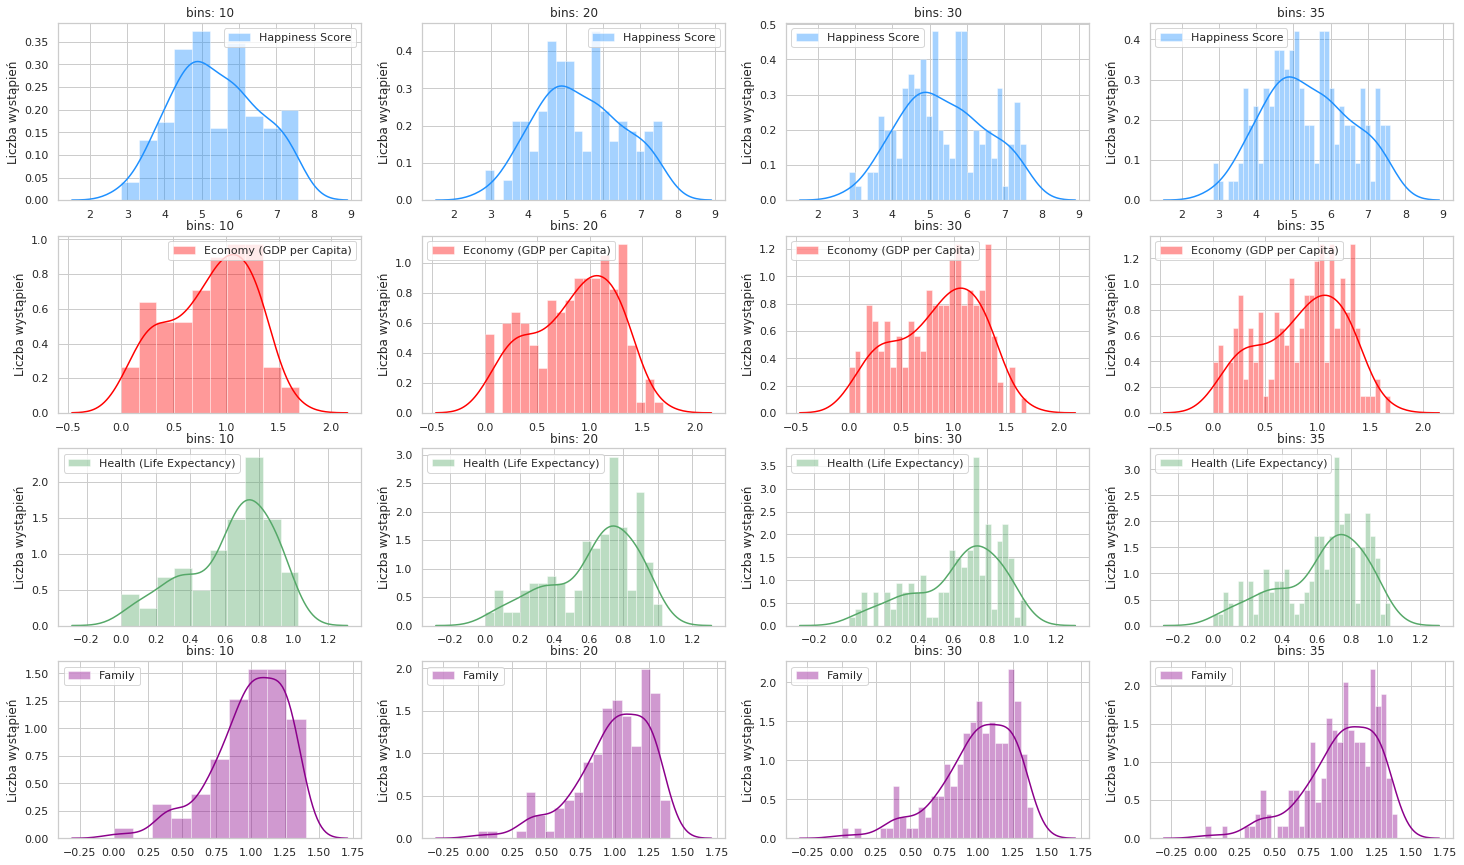

In [11]:
ValueList = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']
binsValues = [10,20,30,35]

DistributionObj.addHist_with_variety_values_of_bins(value=ValueList, bins=binsValues)

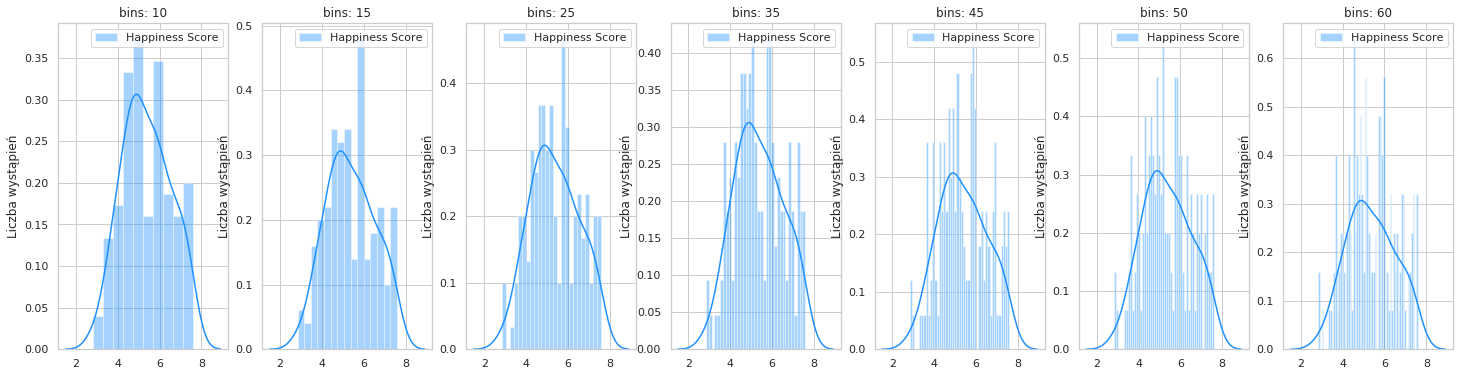

In [12]:
Value = 'Happiness Score'
binsValues = [10, 15, 25, 35, 45, 50, 60]
DistributionObj.addHist_with_variety_values_of_bins(value=Value, bins=binsValues)

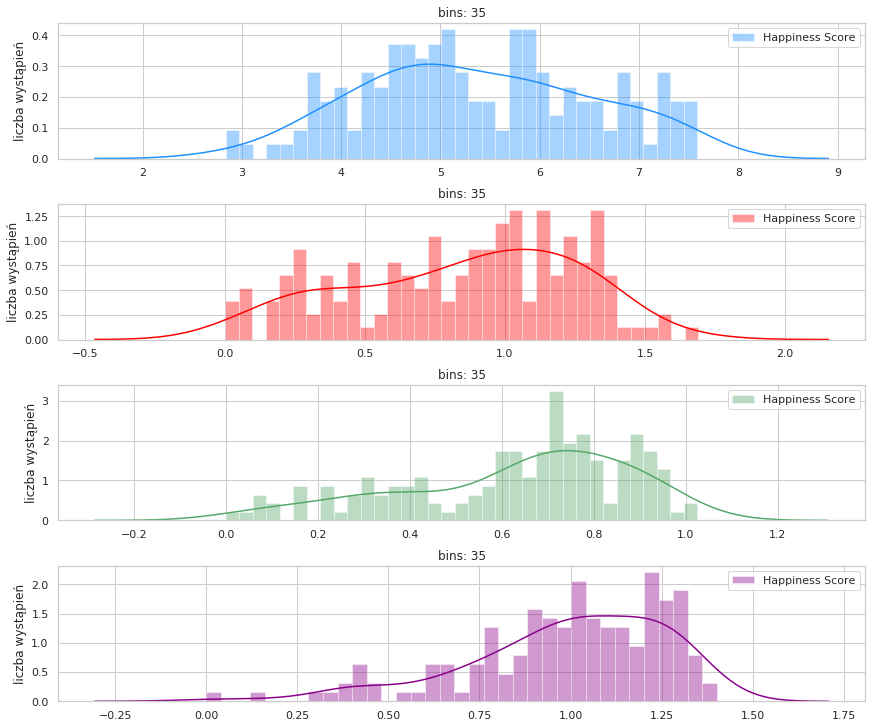

In [13]:
DistributionObj.addHist(value=ValueList, bins=35, set_height=10, set_width=12 )

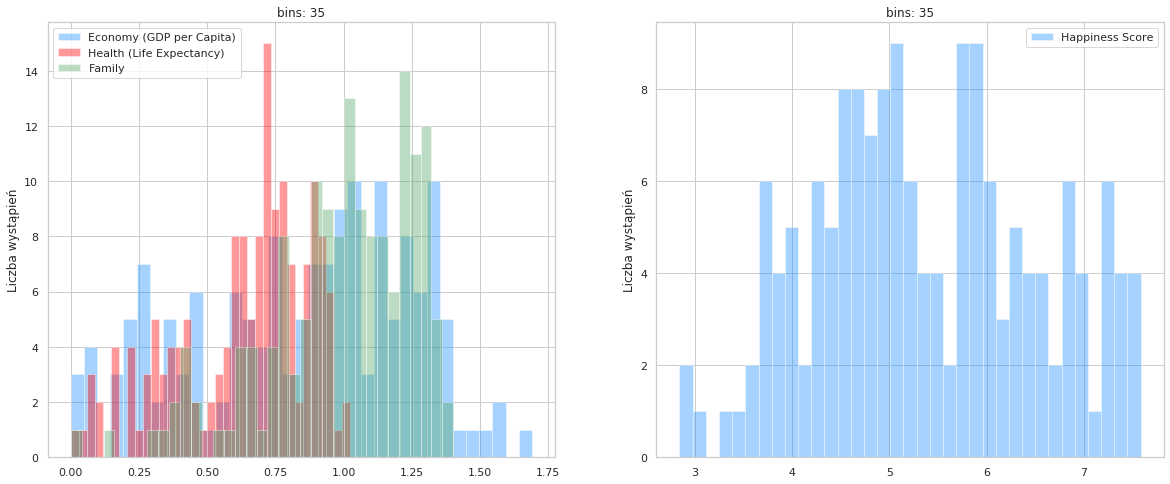

In [14]:
DistributionObj.addStackedHist(list= ValueList, bins=35)

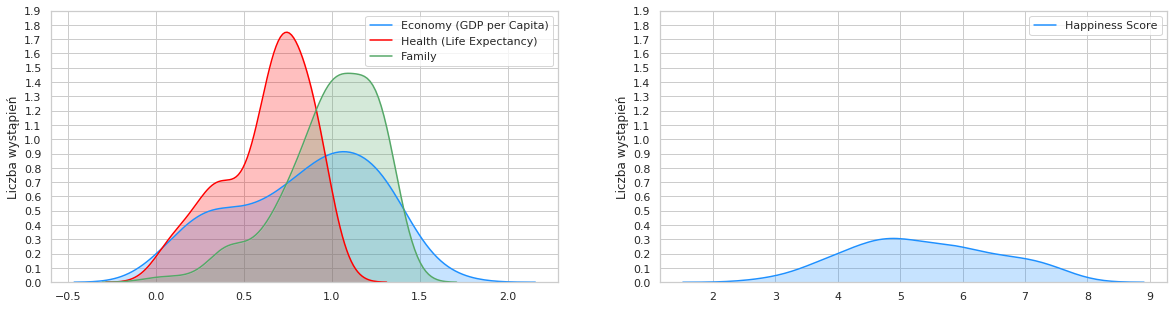

In [15]:
ValueList = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']
DistributionObj.addDensityDistribution(value=ValueList, set_height=5, set_width=20)

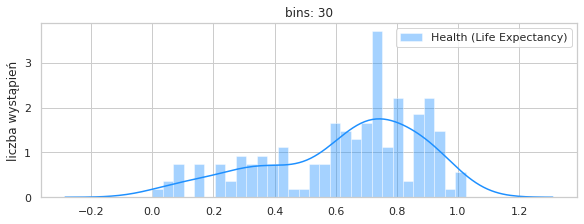

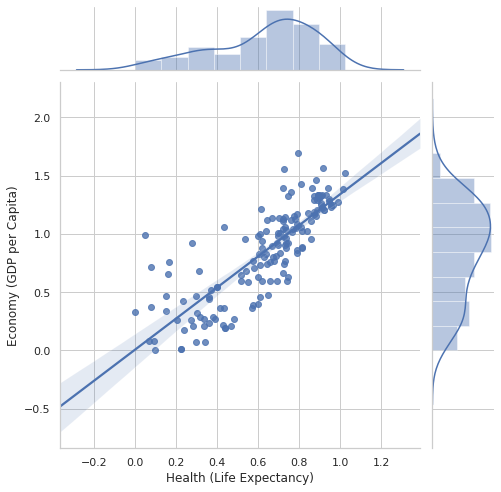

In [16]:
DistributionObj.addHist(value='Health (Life Expectancy)', bins=30, set_height=3, set_width=8)
CorrelationObj.addJointplot(x_data='Health (Life Expectancy)', y_data='Economy (GDP per Capita)', set_height=7, set_ratio=5)
plt.show()

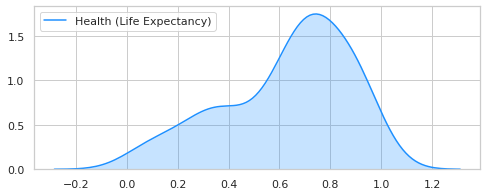

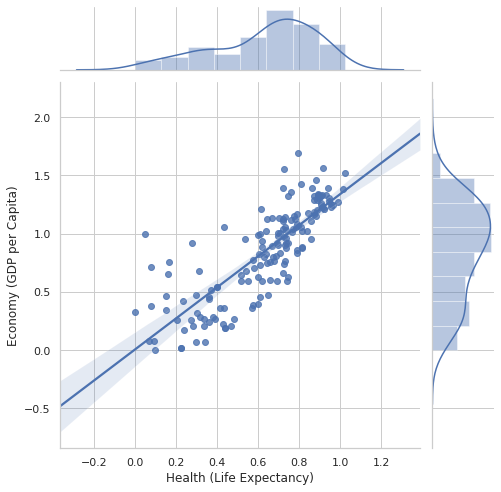

In [17]:
DistributionObj.addDensityDistribution(value='Health (Life Expectancy)', set_height=3, set_width=8)
CorrelationObj.addJointplot( x_data='Health (Life Expectancy)', y_data='Economy (GDP per Capita)',set_height=7, set_ratio=5)
plt.show()

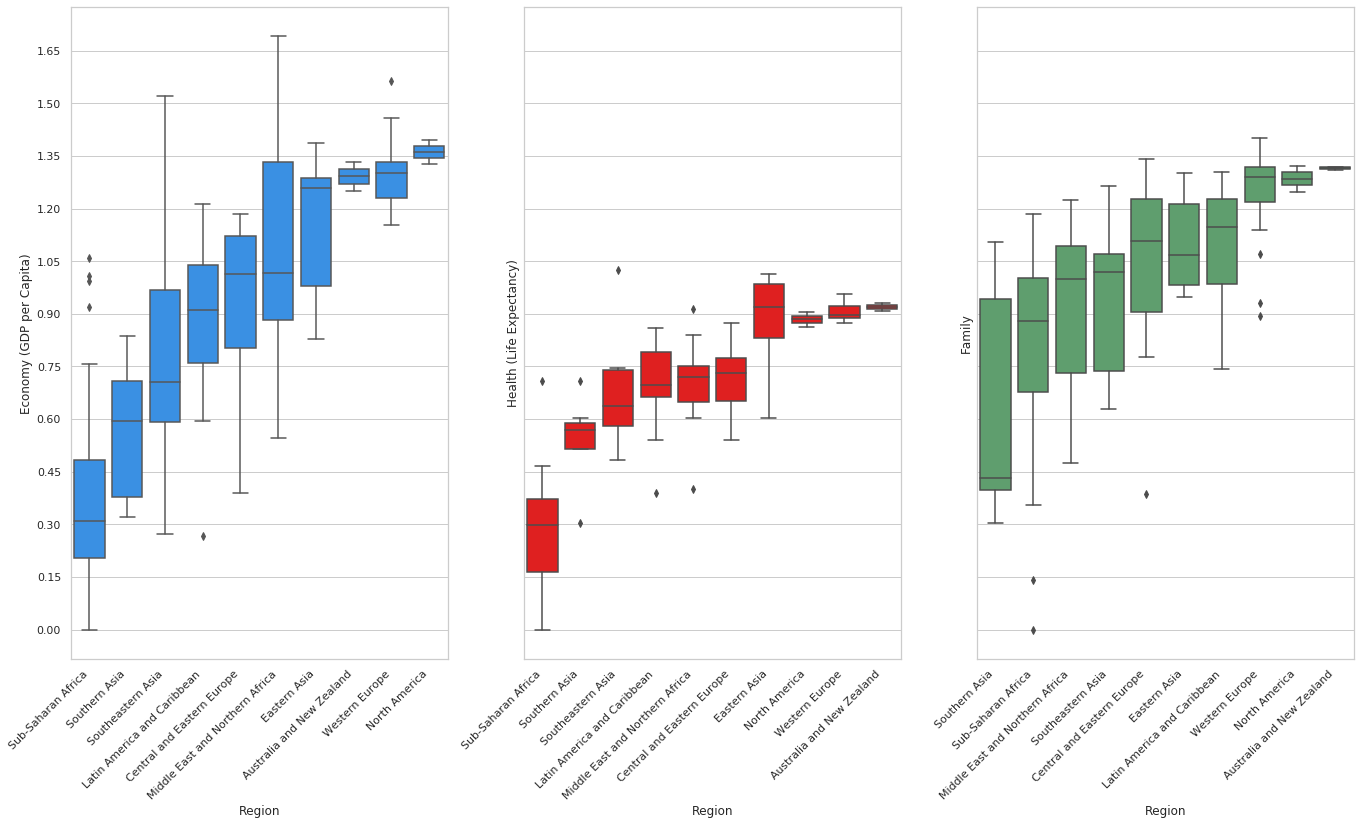

In [18]:
DistributionObj.addBoxPlot(ValueList)

In [19]:
rank1 = happiness2015.groupby("Region")['Economy (GDP per Capita)'].mean().sort_values().index
rank2 = happiness2015.groupby("Region")['Health (Life Expectancy)'].mean().sort_values().index
rank3 = happiness2015.groupby("Region")['Family'].mean().sort_values().index
print(rank1)
print()
print(rank2)
print()
print(rank3)

Index(['Sub-Saharan Africa', 'Southern Asia', 'Southeastern Asia',
       'Latin America and Caribbean', 'Central and Eastern Europe',
       'Middle East and Northern Africa', 'Eastern Asia',
       'Australia and New Zealand', 'Western Europe', 'North America'],
      dtype='object', name='Region')

Index(['Sub-Saharan Africa', 'Southern Asia', 'Southeastern Asia',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'Central and Eastern Europe', 'Eastern Asia', 'North America',
       'Western Europe', 'Australia and New Zealand'],
      dtype='object', name='Region')

Index(['Southern Asia', 'Sub-Saharan Africa',
       'Middle East and Northern Africa', 'Southeastern Asia',
       'Central and Eastern Europe', 'Eastern Asia',
       'Latin America and Caribbean', 'Western Europe', 'North America',
       'Australia and New Zealand'],
      dtype='object', name='Region')


In [20]:
happiness2015.insert(loc=4, column="Rank_Category", value=0)
happiness2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Rank_Category,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [21]:
Happy_Score_greater_than_7 = (happiness2015['Happiness Score'] >= 7)
Happy_Score_between_6_7 =  (happiness2015['Happiness Score'] >= 6) & (happiness2015['Happiness Score'] < 7)
Happy_Score_between_5_6 =  (happiness2015['Happiness Score'] >= 5) & (happiness2015['Happiness Score'] < 6)
Happy_Score_between_4_5 =  (happiness2015['Happiness Score'] >= 4) & (happiness2015['Happiness Score'] < 5)
Happy_Score_between_3_4 =  (happiness2015['Happiness Score'] >= 3) & (happiness2015['Happiness Score'] < 4)
Happy_Score_between_2_3 =  (happiness2015['Happiness Score'] >= 2) & (happiness2015['Happiness Score'] < 3)
Happy_Score_between_0_2 =  (happiness2015['Happiness Score'] < 2)


happiness2015.loc[Happy_Score_greater_than_7, 'Rank_Category'] = '>= 7'
happiness2015.loc[Happy_Score_between_6_7, 'Rank_Category'] = '<6 ; 7)'
happiness2015.loc[Happy_Score_between_5_6, 'Rank_Category'] = '<5 ; 6)'
happiness2015.loc[Happy_Score_between_4_5, 'Rank_Category'] = '<4 ; 5)'
happiness2015.loc[Happy_Score_between_3_4, 'Rank_Category'] = '<3 ; 4)'
happiness2015.loc[Happy_Score_between_2_3, 'Rank_Category'] = '<2 ; 3)'
happiness2015.loc[Happy_Score_between_0_2, 'Rank_Category'] = '(0; 2)'

happiness2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Rank_Category,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,>= 7,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,>= 7,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,>= 7,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


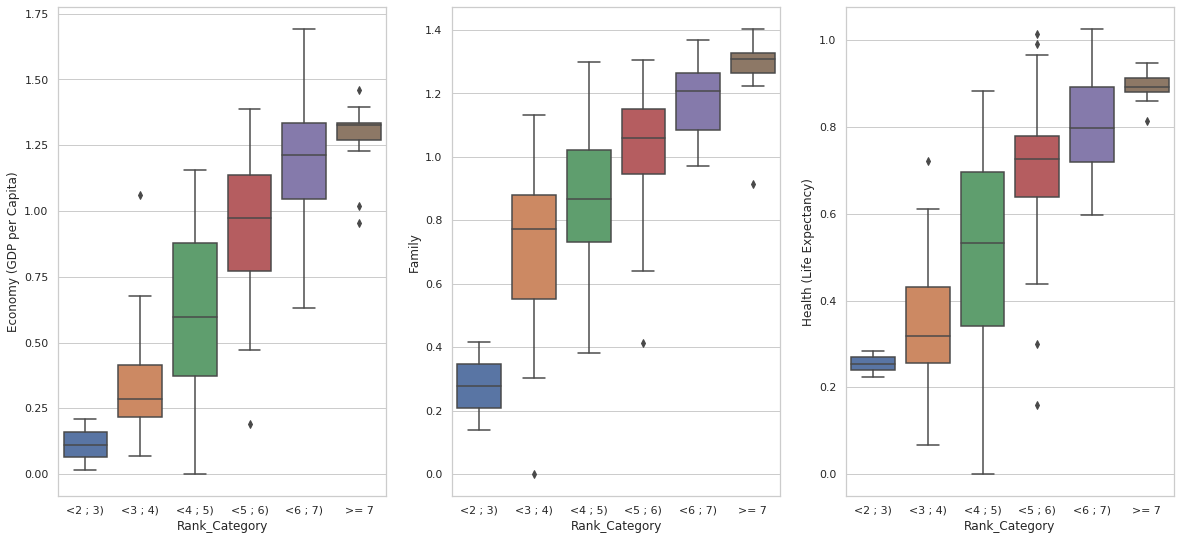

In [22]:
happiness2015 = happiness2015.sort_values(by='Rank_Category')

fig, axes = plt.subplots(1,3, figsize=(20,9))
sns.boxplot(  y="Economy (GDP per Capita)", x= "Rank_Category", data=happiness2015, ax=axes[0])
sns.boxplot(  y="Family", x= "Rank_Category", data=happiness2015, ax=axes[1])
sns.boxplot(  y="Health (Life Expectancy)", x= "Rank_Category", data=happiness2015, ax=axes[2])

plt.show()

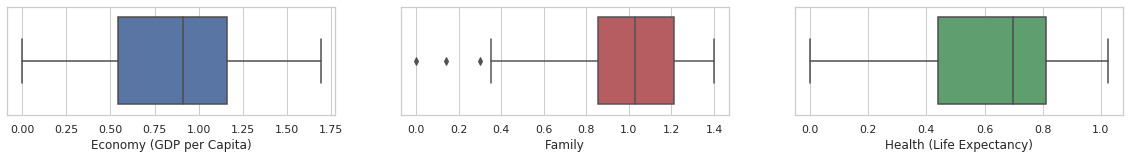

In [23]:
fig, axes = plt.subplots(1,3, figsize=(20,2))
sns.boxplot(  x="Economy (GDP per Capita)", data=happiness2015, ax=axes[0], color='b')
sns.boxplot(  x="Family", data=happiness2015, ax=axes[1], color='r')
sns.boxplot(  x="Health (Life Expectancy)", data=happiness2015, ax=axes[2], color='g')
plt.show()

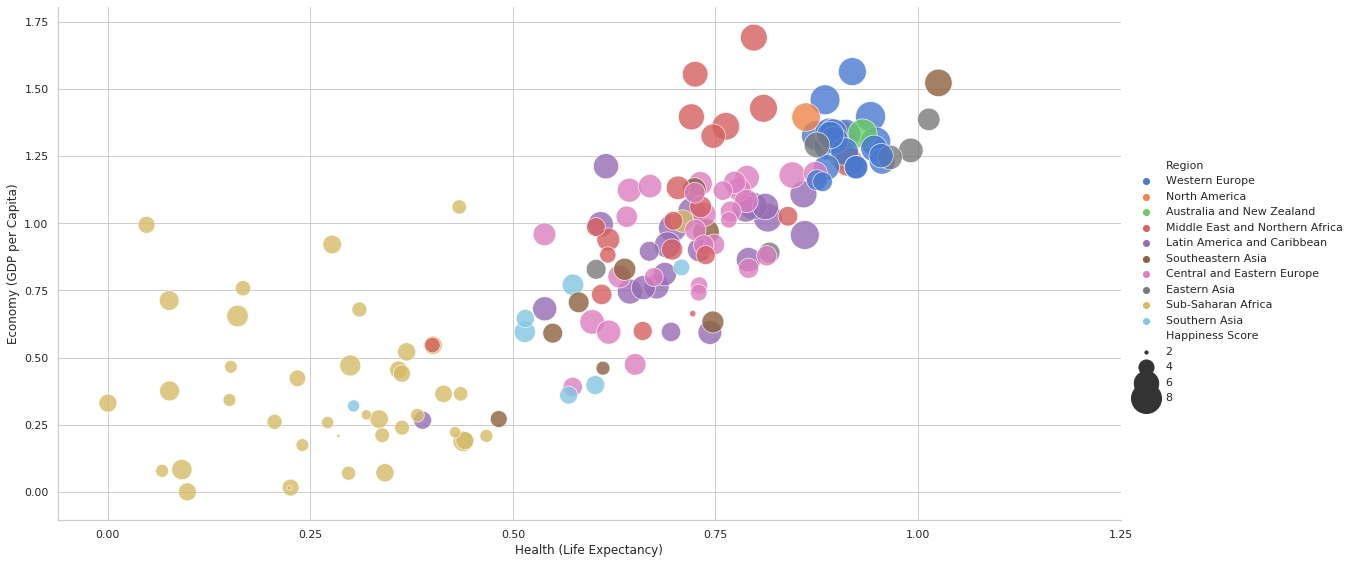

In [24]:
CorrelationObj.addBubbleplot(x_data='Health (Life Expectancy)', y_data='Economy (GDP per Capita)',
                             size='Happiness Score', hue_set='Region', xstep=0.25, ystep=0.25, height=8, aspect=2)

In [25]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Rank_Category,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,<2 ; 3),0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,<2 ; 3),0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
154,Benin,Sub-Saharan Africa,155,3.340,<3 ; 4),0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,<3 ; 4),0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
137,Mali,Sub-Saharan Africa,138,3.995,<3 ; 4),0.05602,0.26074,1.03526,0.20583,0.38857,0.12352,0.18798,1.79293


In [0]:
# feature included in model
X = happiness2015['Economy (GDP per Capita)'].values.reshape(-1,1) # cechy, features

# Choosing variable to be predicted
y = happiness2015['Happiness Score'].values # etykiety, labels

In [27]:
# Tworzę obiekt, model regresi liniowej
lin_reg = LinearRegression()

# Uczę model:
lin_reg.fit(X, y)

# Przewidziane wartości:
happiness_pred = lin_reg.predict(X)

print('PREDICTED VALUES:\n {}'.format(happiness_pred[:5]))

PREDICTED VALUES:
 [3.9617093  3.53274853 4.13466446 4.96993789 4.0771902 ]


In [28]:
# Wykorzystanie modelu:
new_Economy_values = np.array([0.2, 0.5, 1.25, 1.6])
new_Happiness_Scores = lin_reg.predict(new_Economy_values.reshape(-1,1))
new_Happiness_Scores

array([3.94245508, 4.60792322, 6.27159356, 7.04797305])

In [29]:
print('Współczynnik a:    {}'.format(lin_reg.coef_))
print('Wartość stała b: {}'.format(lin_reg.intercept_))

a = round(lin_reg.coef_[0], 3)
b = round(lin_reg.intercept_, 3)

print()
print('Równanie prostej: y = {}x + {}'.format(a, b))
print()

accuracy = mean_squared_error(y, happiness_pred) # Mean Squared Error
print('ACCURACY(MSE): {}%'.format(round(accuracy*100, 2)))

# Ile było dobrych w porównianiu do wszystkich wyników:
# Metod score oblicza przewidywane wartości w oparciu o X_test, a następnie porównać je z y_test
score = lin_reg.score(X, y)
print('SCORE: {}%'.format(round(score*100,2)))

Współczynnik a:    [2.21822712]
Wartość stała b: 3.4988096598243645

Równanie prostej: y = 2.218x + 3.499

ACCURACY(MSE): 50.82%
SCORE: 60.99%


In [30]:
# Po przeskalowaniu wartości:
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_sc, y)

happiness_pred_sc = lin_reg.predict(X_sc)

# Wykorzystanie modelu:
new_Economy_values_sc = np.array([0.2, 0.5, 1.25, 1.6])
new_Happiness_Scores_sc = lin_reg.predict(new_Economy_values_sc.reshape(-1,1))


score = lin_reg.score(X_sc, y)
print('SCORE: {}%'.format(round(score*100,2)))

SCORE: 60.99%


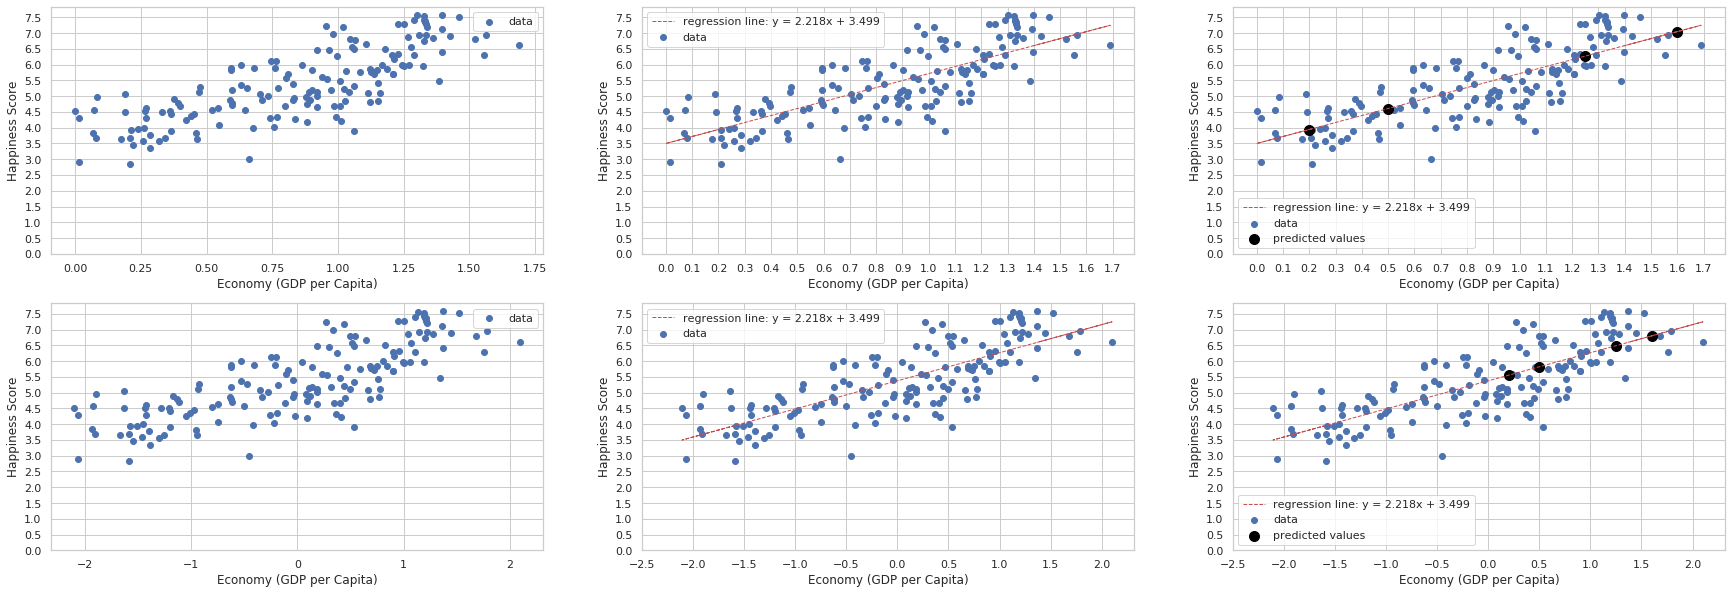

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

axes[0,0].scatter(X, y, label='data')
axes[0,0].set_yticks(np.arange(0, 8, step=0.5))
axes[0,0].set(xlabel='Economy (GDP per Capita)', ylabel='Happiness Score')
axes[0,0].legend()

axes[0,1].scatter(X, y, label='data')
axes[0,1].plot(X, happiness_pred, c="r", ls="--", linewidth=1, label='regression line: y = {}x + {}'.format(a, b))
axes[0,1].set_xticks(np.arange(0, 1.8, step=0.1))
axes[0,1].set_yticks(np.arange(0, 8, step=0.5))
axes[0,1].set(xlabel='Economy (GDP per Capita)', ylabel='Happiness Score')
axes[0,1].legend()

axes[0,2].scatter(X, y, label='data')
axes[0,2].plot(X, happiness_pred, c="r", ls="--", linewidth=1, label='regression line: y = {}x + {}'.format(a, b))
axes[0,2].scatter(new_Economy_values, new_Happiness_Scores, color='Black', s=100, label='predicted values')
axes[0,2].set_xticks(np.arange(0, 1.8, step=0.1))
axes[0,2].set_yticks(np.arange(0, 8, step=0.5))
axes[0,2].set(xlabel='Economy (GDP per Capita)', ylabel='Happiness Score')
axes[0,2].legend()


# ###### PO Przeskalowaniu wartości:

axes[1,0].scatter(X_sc, y, label='data')
axes[1,0].set_yticks(np.arange(0, 8, step=0.5))
axes[1,0].set(xlabel='Economy (GDP per Capita)', ylabel='Happiness Score')
axes[1,0].legend()

axes[1,1].scatter(X_sc, y, label='data')
axes[1,1].plot(X_sc, happiness_pred, c="r", ls="--", linewidth=1, label='regression line: y = {}x + {}'.format(a, b))
axes[1,1].set_xticks(np.arange(-2.5, 2.5, step=0.5))
axes[1,1].set_yticks(np.arange(0, 8, step=0.5))
axes[1,1].set(xlabel='Economy (GDP per Capita)', ylabel='Happiness Score')
axes[1,1].legend()

axes[1,2].scatter(X_sc, y, label='data')
axes[1,2].plot(X_sc, happiness_pred, c="r", ls="--", linewidth=1, label='regression line: y = {}x + {}'.format(a, b))
axes[1,2].scatter(new_Economy_values_sc, new_Happiness_Scores_sc, color='Black', s=100, label='predicted values')
axes[1,2].set_xticks(np.arange(-2.5, 2.5, step=0.5))
axes[1,2].set_yticks(np.arange(0, 8, step=0.5))
axes[1,2].set(xlabel='Economy (GDP per Capita)', ylabel='Happiness Score')
axes[1,2].legend()

plt.show()

In [0]:
# Model regresji liniowej pracujący na trzech zmiennych wejściowych:
X = happiness2015[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']].values
y = happiness2015['Happiness Score'].values.reshape(-1,1)

# Przeskaluję dane
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [33]:
for i in range(25):  
  # Następnie podzielimy dane na zbiory uczące i testowe:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)
  
  score = lr.score(X_test, y_test)
  print('SCORE: {}%'.format(round(score*100,2)))

SCORE: 56.97%
SCORE: 83.78%
SCORE: 78.53%
SCORE: 68.24%
SCORE: 55.16%
SCORE: 79.71%
SCORE: 68.17%
SCORE: 55.17%
SCORE: 78.21%
SCORE: 69.42%
SCORE: 64.91%
SCORE: 69.66%
SCORE: 76.85%
SCORE: 83.47%
SCORE: 66.34%
SCORE: 55.16%
SCORE: 69.39%
SCORE: 74.01%
SCORE: 60.29%
SCORE: 63.51%
SCORE: 72.79%
SCORE: 65.61%
SCORE: 61.25%
SCORE: 67.71%
SCORE: 71.92%


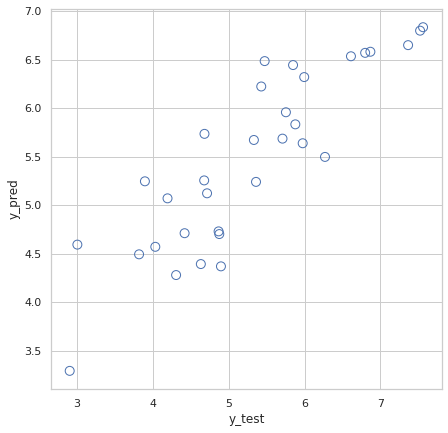

In [34]:
# Jak poszło przewidywanie danych
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, s=80, facecolors='none', edgecolors='b')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [35]:
print('Wartości wag:    {}'.format(lr.coef_))
print('Wartość stała w0: {}'.format(lr.intercept_))

w1 = round(lr.coef_[0][0], 3)
w2 = round(lr.coef_[0][1], 3)
w3 = round(lr.coef_[0][2], 3)

w0 = round(lr.intercept_[0], 3)

print()
print('Równanie funkcji wielomianowej: y = {} + {}x + {}x\u00b2 + {}x\u00b3'.format(w0, w1, w2, w3))


# Ile było dobrych w porównianiu do wszystkich wyników:
# Metoda score oblicza przewidywane wartości w oparciu o X_test, a następnie porównać je z y_test
score = lr.score(X_test, y_test)
print('SCORE: {}%'.format(round(score*100,2)))

Wartości wag:    [[0.37510081 0.30157695 0.40059866]]
Wartość stała w0: [5.41270065]

Równanie funkcji wielomianowej: y = 5.413 + 0.375x + 0.302x² + 0.401x³
SCORE: 71.92%


In [36]:
columns_list = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family', 'predicted Happiness Score']
index_names=[]

CountryA = {'Economy' : 0.8, 'Health' : 0.73, 'Family' : 1.2 }
CountryB = {'Economy' : 0.2, 'Health' : 1,    'Family' : 0.5 }
CountryC = {'Economy' : 1.6, 'Health' : 0.2,  'Family' : 0.1 }
CountryD = {'Economy' : 1.5, 'Health' : 0.95, 'Family' : 1.3 }

new_countries_dict = {'CountryA' : CountryA,
                      'CountryB' : CountryB,
                      'CountryC' : CountryC,
                      'CountryD' : CountryD}

# Tworzę data frame
for key in new_countries_dict.keys():
  index_names.append(key)
  pred_happiness_df = pd.DataFrame(index=index_names, columns=columns_list )                      

# Wpisuję wartości do pred_happiness_df
for i, (key, dict) in enumerate(new_countries_dict.items()):
        new_country = np.array([ dict['Economy'], dict['Health'], dict['Family'] ]).reshape(1,3)
        pred_happiness = lr.predict(new_country)[0][0]
        pred_happiness = round(pred_happiness, 3)
        pred_happiness_df.iloc[i] = [dict['Economy'], dict['Health'], dict['Family'], pred_happiness]

pred_happiness_df

,Economy (GDP per Capita),Health (Life Expectancy),Family,predicted Happiness Score
CountryA,0.8,0.73,1.2,6.414
CountryB,0.2,1,0.5,5.99
CountryC,1.6,0.2,0.1,6.113
CountryD,1.5,0.95,1.3,6.783


In [37]:
# Mały test głębokiej sieci neuronowej:
from tensorflow import keras

X = happiness2015[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']].values
y = happiness2015['Happiness Score'].values.reshape(-1,1)

# Deklaracja sieci w sposób sekwencyjny:
model = keras.models.Sequential()
 
model.add(keras.layers.Dense(32, activation='relu', input_shape=(3,)))

model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation=keras.activations.relu))
model.add(keras.layers.Dense(4, activation=keras.activations.relu))
model.add(keras.layers.Dense(2, activation=keras.activations.relu))

model.add(keras.layers.Dense(1, activation='linear'))
 
# Podsumowanie informacji o modelu
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 841
Trainable params: 841
N

In [38]:
# Kompilacja modelu:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Uczenie sieci
history  = model.fit(X, y, batch_size=5, epochs=25, validation_split=0.2)

Train on 126 samples, validate on 32 samples
Epoch 1/25
126/126 [==============================] - 0s 1ms/sample - loss: 24.3280 - mean_squared_error: 24.3280 - val_loss: 41.4574 - val_mean_squared_error: 41.4574
Epoch 2/25
126/126 [==============================] - 0s 377us/sample - loss: 20.3194 - mean_squared_error: 20.3194 - val_loss: 31.8083 - val_mean_squared_error: 31.8083
Epoch 3/25
126/126 [==============================] - 0s 375us/sample - loss: 12.0295 - mean_squared_error: 12.0295 - val_loss: 12.4307 - val_mean_squared_error: 12.4307
Epoch 4/25
126/126 [==============================] - 0s 341us/sample - loss: 1.9409 - mean_squared_error: 1.9409 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 5/25
126/126 [==============================] - 0s 351us/sample - loss: 0.4739 - mean_squared_error: 0.4739 - val_loss: 0.5820 - val_mean_squared_error: 0.5820
Epoch 6/25
126/126 [==============================] - 0s 437us/sample - loss: 0.3573 - mean_squared_error: 0.3573 -

In [39]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epochs')]

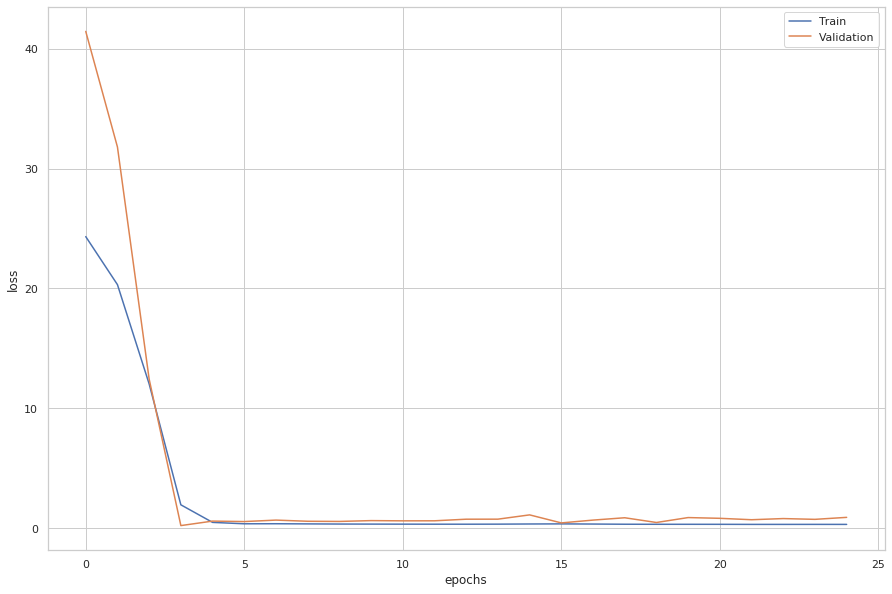

In [40]:
fig, axes = plt.subplots(figsize=(15,10))
axes.plot(history.history['loss'], label='Train')
axes.plot(history.history['val_loss'], label='Validation')
axes.legend(loc='best')
axes.set(xlabel='epochs', ylabel='loss')